# Projekt praktyczny (regresja)

## Zbiór danych *Life Expectancy Data.csv* następujące kolumny:
- Country - państwo\
- Status - kraj rozwijający się / rozwinięty\
- Life expectancy - oczekiwana długość życia w latach\
- Adult Mortality - śmiertelność wśród dorosłych, prawdopodobieństwo śmierci w wieku między 15 a 60 lat na 1000 osób\
- infant deaths - śmiertelnośc noworodków w przeliczeniu na 1000 urodzeń\
- Alcohol - konsumpcja alkoholu wśród osób 15+ [w litrach]\
- percentage expenditure - udział wydatków na sektor zdrowia w PKB per capita\
- Hepatitis B - udział zaszczepionych dzieci do 1 roku życia na WZW typu B\
- Measles - liczba odnotowanych przypadków zachorowań na odrę na 1000 mieszkańców\
- BMI\
- under-five deaths - liczba śmierci na 1000 dzieci poniżej 5 roku życia\
- Polio - udział zaszczepionych dzieci do 1 roku życia na Polio\
- Total expenditure - udział wydatków na sektor zdrowia w całości wydatków rządowych\
- Diphtheria - udział zaszczepionych dzieci do 1 roku życia na błonicę i krztusiec\
- HIV/AIDS - śmierci dzieci poniżej 5 roku życia na 1 000 żywych urodzeń spowodowane HIV/AIDS\
- GDP - PKB per capita\
- Population - liczba mieszkańców\
- thinness 1-19 years - rozpowszechnienie chudości w wieku 1 -19 lat\
- thinness 5-9 years - rozpowszechnienie chudości w wieku 5 - 9 lat\
- Income composition of resources - Wskaźnik rozwoju społecznego HDI Human Development Index\
- Schooling - liczba lat nauczania szkolnego\

# Celem projektu jest:
1. przygotowanie i analiza dostarczonych danych
2. budowa i analiza jakości modeli do prognozy oczekiwanej długości życia w latach
3. ocena opracowanych modeli

## Zaimportuj biblioteki

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## Wczytaj plik *Life Expectancy Data.csv* oraz wyświetl kilka pierwszych wierszy



In [ ]:
data = pd.read_csv("/content/Life Expectancy Data.csv", sep = ';')
data.head(5)

,Country,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Albania,Developing,77.8,74.0,0,4.60,364.975229,99.0,0,58.0,...,99.0,6.00,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2
2,Algeria,Developing,75.6,19.0,21,NaN,0.000000,95.0,63,59.5,...,95.0,NaN,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4
3,Angola,Developing,52.4,335.0,66,NaN,0.000000,64.0,118,23.3,...,7.0,NaN,64.0,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4
4,Antigua and Barbuda,Developing,76.4,13.0,0,NaN,0.000000,99.0,0,47.7,...,86.0,NaN,99.0,0.2,13566.954100,NaN,3.3,3.3,0.784,13.9


# Preprocessing
- wyświetl rozmiar zbioru
- sprawdź ilość NaN-ów
- jesli występują kolumny z dużą lością NaN-ów usuń je
- sprawdź statystyki NaN-ów dla wierszy (m.in. jaka jest mininalna, maxymalna, srednia liczba nanów w wierszu). Jeśli są wiersze, dla których jest >=5 braki usuń je i zresetuj indexy
- wyświetl wiersze od 170 do 175
- pozostałe NaN-y uzupełnij średnią
- oblicz statystyki opisowe

In [ ]:
# wyświetl rozmiar zbioru
print("Rozmiar zbioru danych:", data.shape)

Rozmiar zbioru danych: (183, 21)


In [ ]:
# sprawdź ilość NaN-ów
print("\nIlość NaN-ów w każdej kolumnie:")
print(data.isnull().sum())


Ilość NaN-ów w każdej kolumnie:
Country                              0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                            177
percentage expenditure               0
Hepatitis B                          9
Measles                              0
BMI                                  2
under-five deaths                    0
Polio                                0
Total expenditure                  181
Diphtheria                           0
HIV/AIDS                             0
GDP                                 29
Population                          41
thinness 1-19 years                  2
thinness 5-9 years                   2
Income composition of resources     10
Schooling                           10
dtype: int64


In [ ]:
# Usunięcie kolumn z dużą ilością NaN-ów (założmy, że zakładamy usunięcie kolumn z ponad 30% wartości NaN)
threshold = len(data) * 0.3
data.dropna(axis=1, thresh=threshold, inplace=True)

print("\nIlość NaN-ów w każdej kolumnie po usunięciu:")
print(data.isnull().sum())


Ilość NaN-ów w każdej kolumnie po usunięciu:
Country                             0
Status                              0
Life expectancy                     0
Adult Mortality                     0
infant deaths                       0
percentage expenditure              0
Hepatitis B                         9
Measles                             0
BMI                                 2
under-five deaths                   0
Polio                               0
Diphtheria                          0
HIV/AIDS                            0
GDP                                29
Population                         41
thinness 1-19 years                 2
thinness 5-9 years                  2
Income composition of resources    10
Schooling                          10
dtype: int64


In [ ]:
# Sprawdzenie statystyk NaN-ów dla wierszy
nan_stats = data.isnull().sum(axis=1)
print("\nStatystyki NaN-ów dla wierszy:")
print(nan_stats)


Statystyki NaN-ów dla wierszy:
0      0
1      0
2      0
3      0
4      1
      ..
178    2
179    2
180    2
181    0
182    0
Length: 183, dtype: int64


In [ ]:
# Zliczenie wierszy z 5 lub więcej brakami
rows_above_threshold = sum(nan_stats >= 5)
print("Liczba wierszy z 5 lub więcej brakami:", rows_above_threshold)


Liczba wierszy z 5 lub więcej brakami: 1


In [ ]:
# Usunięcie wierszy z co najmniej 5 brakami i zresetowanie indeksów
data = data[data.isnull().sum(axis=1) < 5].reset_index(drop=True)
data.shape

(182, 19)

In [ ]:
# Wyświetlenie wierszy od 170 do 175
print("\nWiersze od 170 do 175:")
print(data.loc[170:175])


Wiersze od 170 do 175:
                         Country      Status  Life expectancy  \
170                      Ukraine  Developing             71.3   
171         United Arab Emirates  Developing             77.1   
172  United Republic of Tanzania  Developing             61.8   
173     United States of America   Developed             79.3   
174                      Uruguay  Developing             77.0   
175                   Uzbekistan  Developing             69.4   

     Adult Mortality  infant deaths  percentage expenditure  Hepatitis B  \
170            195.0              4                     0.0         22.0   
171             75.0              1                     0.0         99.0   
172            279.0             85                     0.0         98.0   
173             13.0             23                     0.0         92.0   
174            116.0              0                     0.0         95.0   
175            184.0             15                     0.0     

In [ ]:
# Wybierz tylko kolumny zawierające dane liczbowe
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Uzupełnienie pozostałych NaN-ów średnią dla danych kolumn
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

In [ ]:
# Obliczenie statystyk opisowych
print("\nStatystyki opisowe:")
print(data.describe())


Statystyki opisowe:
       Life expectancy  Adult Mortality  infant deaths  \
count       182.000000       182.000000     182.000000   
mean         71.564286       153.324176      23.917582   
std           8.114743        97.630430      83.900288   
min          51.000000         1.000000       0.000000   
25%          65.725000        74.250000       0.000000   
50%          73.750000       138.500000       2.000000   
75%          76.850000       214.000000      17.000000   
max          88.000000       484.000000     910.000000   

       percentage expenditure  Hepatitis B       Measles         BMI  \
count              182.000000   182.000000    182.000000  182.000000   
mean                 2.397005    82.425287   1510.659341   42.621667   
std                 27.536214    23.471921   7863.325029   20.551768   
min                  0.000000     6.000000      0.000000    2.500000   
25%                  0.000000    81.000000      0.000000   24.300000   
50%                  0.0

# Wizualizacja

Wykonaj wykresy rozkładu (histogram i ramka-wąsy) zmiennej *Life expectancy* skategoryzowane w zalezności od statusu kraju. Zinterpretuj wyniki.

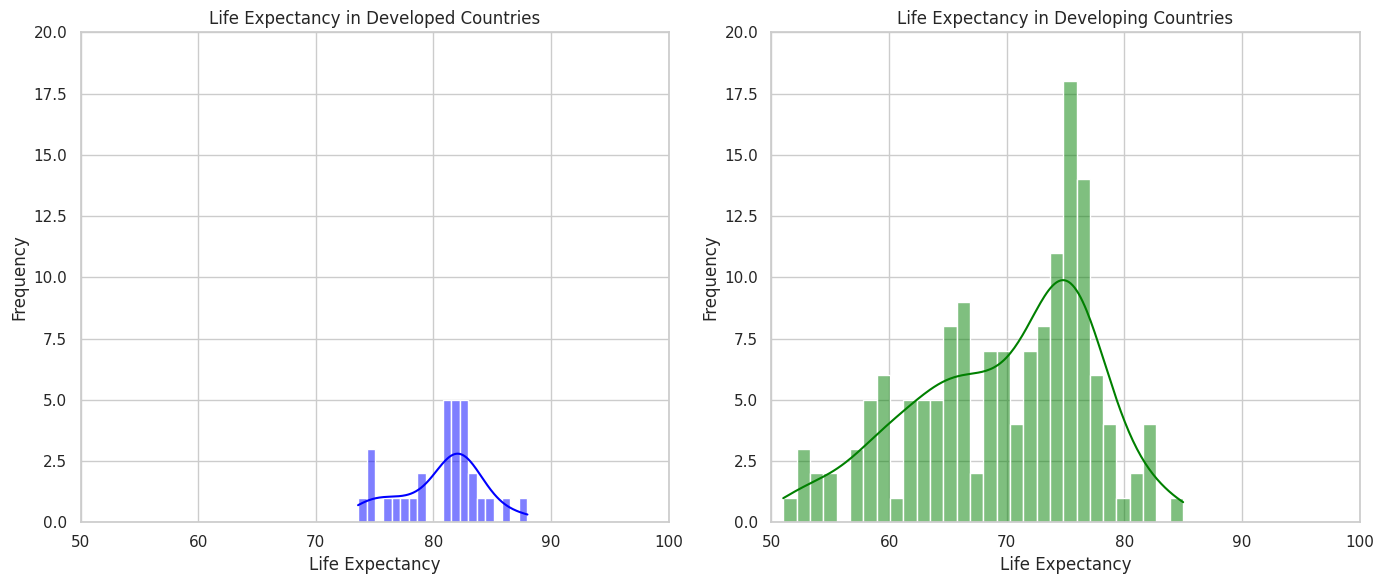

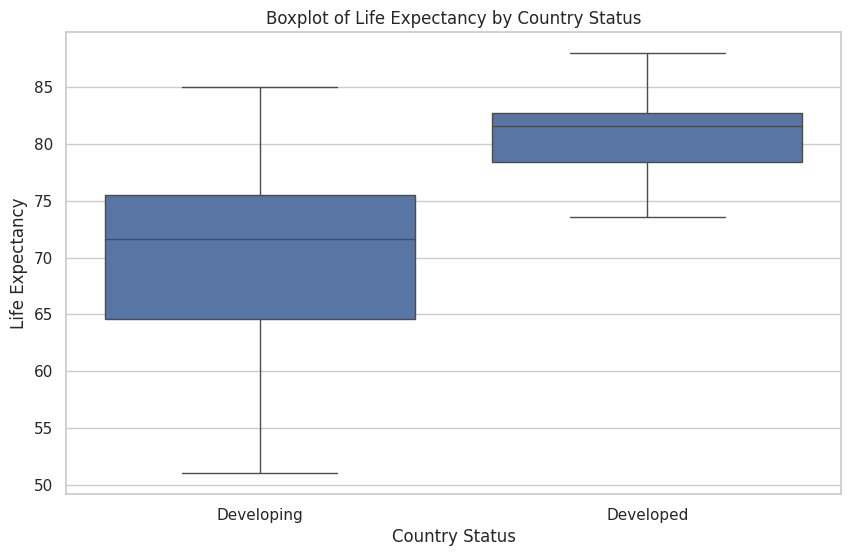

In [ ]:
# Ustawienia dla lepszego wyglądu wykresów
sns.set(style="whitegrid")

# Histogram dla rozwiniętych krajów
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(data[data['Status'] == 'Developed']['Life expectancy'], bins=20, kde=True, color='blue')
plt.title('Life Expectancy in Developed Countries')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')
plt.xlim(50, 100)
plt.ylim(0, 20)

# Histogram dla rozwijających się krajów
plt.subplot(1, 2, 2)
sns.histplot(data[data['Status'] == 'Developing']['Life expectancy'], bins=30, kde=True, color='green')
plt.title('Life Expectancy in Developing Countries')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')
plt.xlim(50, 100)
plt.ylim(0, 20)

plt.tight_layout()
plt.show()

# Boxplot dla krajów rozwiniętych i rozwijających się
plt.figure(figsize=(10, 6))
sns.boxplot(x='Status', y='Life expectancy', data=data)
plt.title('Boxplot of Life Expectancy by Country Status')
plt.xlabel('Country Status')
plt.ylabel('Life Expectancy')
plt.show()



# Korelacja
Wykonaj macierz korelacji dla zmiennych ilościowych. Z którymi zmiennymi skorelowana jest zmienna *Life expectancy*. Zinterpretuj te korelacje.

                                 Life expectancy  Adult Mortality  \
Life expectancy                         1.000000        -0.778098   
Adult Mortality                        -0.778098         1.000000   
infant deaths                          -0.240637         0.187439   
percentage expenditure                  0.044703        -0.043432   
Hepatitis B                             0.400029        -0.227496   
Measles                                -0.073734         0.050449   
BMI                                     0.507324        -0.362551   
under-five deaths                      -0.271345         0.211257   
Polio                                   0.514539        -0.370929   
Diphtheria                              0.499242        -0.321142   
HIV/AIDS                               -0.608261         0.620597   
GDP                                     0.426411        -0.311427   
Population                             -0.043955         0.041731   
thinness 1-19 years               

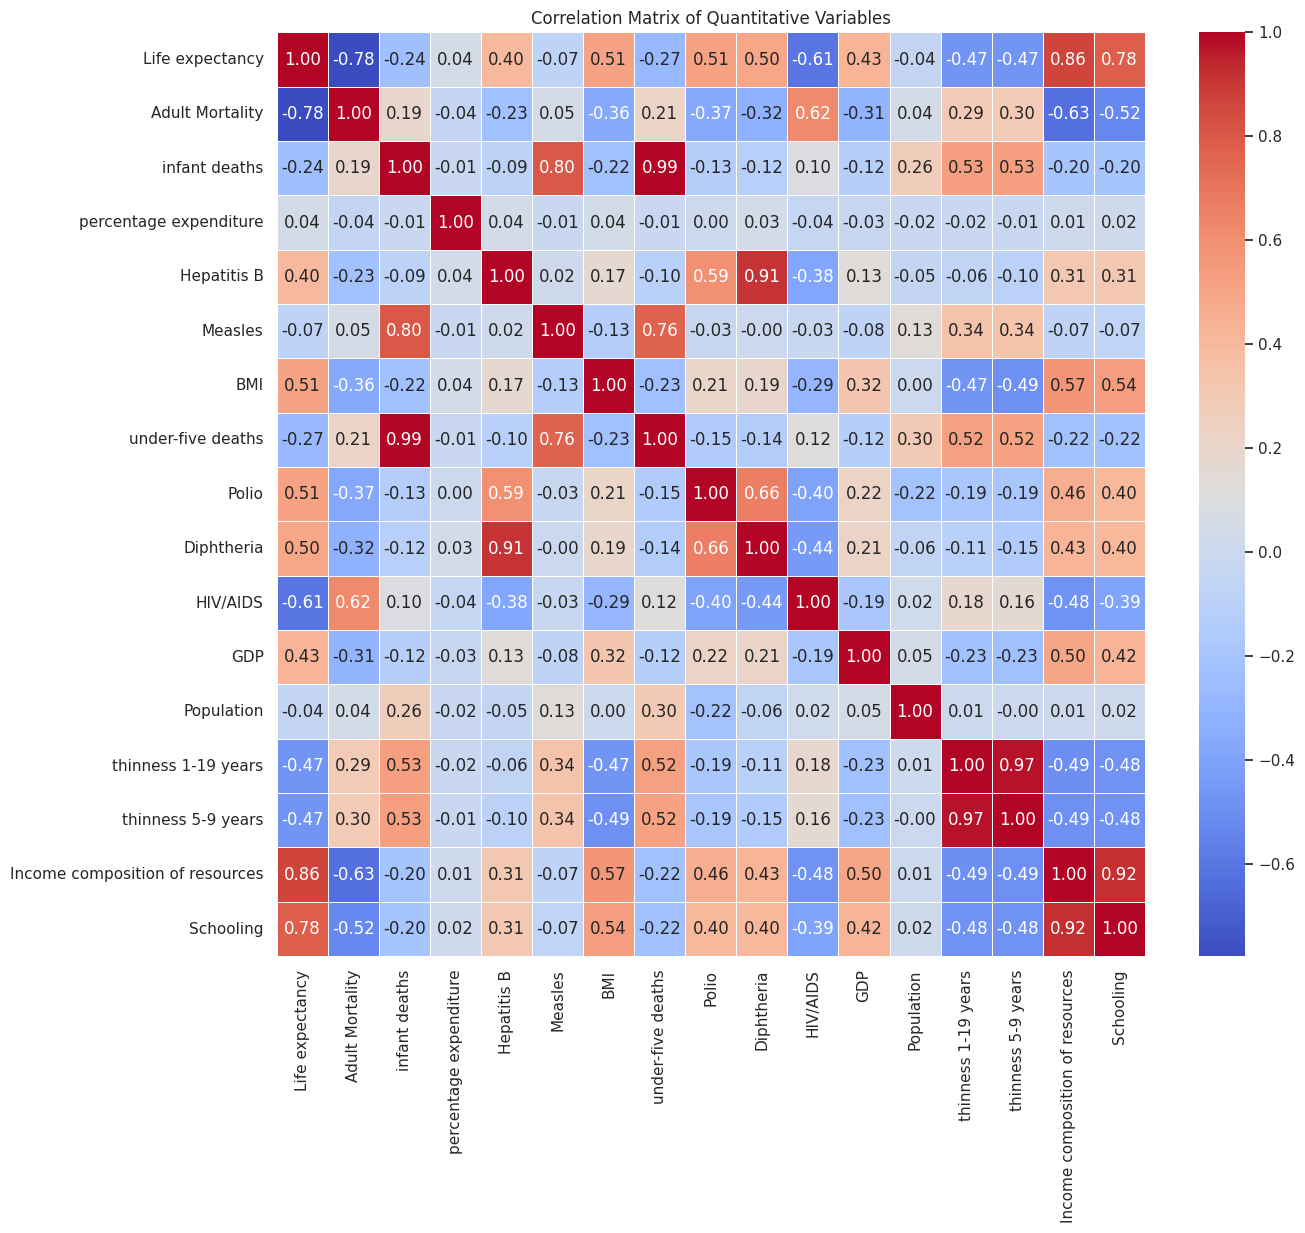

Life expectancy                    1.000000
Income composition of resources    0.864762
Schooling                          0.779746
Polio                              0.514539
BMI                                0.507324
Diphtheria                         0.499242
GDP                                0.426411
Hepatitis B                        0.400029
percentage expenditure             0.044703
Population                        -0.043955
Measles                           -0.073734
infant deaths                     -0.240637
under-five deaths                 -0.271345
thinness 5-9 years                -0.466594
thinness 1-19 years               -0.466750
HIV/AIDS                          -0.608261
Adult Mortality                   -0.778098
Name: Life expectancy, dtype: float64


In [ ]:
# Wybór zmiennych ilościowych
quantitative_vars = [
    'Life expectancy', 'Adult Mortality', 'infant deaths', 'percentage expenditure',
    'Hepatitis B', 'Measles', 'BMI', 'under-five deaths', 'Polio',
    'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness 1-19 years',
    'thinness 5-9 years', 'Income composition of resources', 'Schooling'
]


# Filtrowanie danych do zmiennych ilościowych
quantitative_data = data[quantitative_vars]


# Obliczanie macierzy korelacji
correlation_matrix = quantitative_data.corr()


# Wyświetlenie macierzy korelacji
print(correlation_matrix)


# Wizualizacja macierzy korelacji za pomocą heatmapy
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Quantitative Variables')
plt.show()


# Wyodrębnienie korelacji zmiennej Life expectancy z innymi zmiennymi
life_expectancy_corr = correlation_matrix['Life expectancy']
print(life_expectancy_corr.sort_values(ascending=False))


# Podziel zbiór danych na zbiór treningowy i testowy w stodunku 80% do 20%.

In [ ]:
# Podział na zbiór treningowy i testowy w stosunku 80% do 20%
X = data[['BMI']]
y = data['Life expectancy']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Regresja linowa jednej zmiennej
- Zbuduj model regresji liniowej prostej (jednej zmiennej) umozliwijący przewidywanie długości życia. Odpowiednio przygotuj X (zmienna objaśniająca) i y (zmienna objasniana).
- Wykonaj predykcję dla zbioru treningowego i testowego
- Oblicz metryki (R2, MAE, MSE, RMSE). Oceń jakość modelu (dobrze dopasowany, przetrenowany, niedotrenowany).

In [ ]:
# Budowa modelu regresji liniowej jednej zmiennej
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predykcja dla zbioru treningowego i testowego
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Obliczenie metryk
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

# Ocena jakości modelu
if r2_train > 0.8 and r2_test > 0.8:
    quality = "dobrze dopasowany"
elif r2_train > 0.8 and r2_test < 0.8:
    quality = "przetrenowany"
else:
    quality = "niedotrenowany"

# Wyniki
print("\nMetryki regresji liniowej jednej zmiennej:")
print("R2 (train):", r2_train)
print("R2 (test):", r2_test)
print("MAE (train):", mae_train)
print("MAE (test):", mae_test)
print("MSE (train):", mse_train)
print("MSE (test):", mse_test)
print("RMSE (train):", rmse_train)
print("RMSE (test):", rmse_test)
print("Ocena jakości modelu:", quality)


Metryki regresji liniowej jednej zmiennej:
R2 (train): 0.31778164483014437
R2 (test): 0.05064631935915653
MAE (train): 5.126347082218824
MAE (test): 6.355682445268353
MSE (train): 42.71819661640537
MSE (test): 72.85055824559188
RMSE (train): 6.535915897286728
RMSE (test): 8.535253847753555
Ocena jakości modelu: niedotrenowany


# Regresja linowa wielu zmiennych
- Zbuduj model regresji liniowej wielu zmiennych umozliwijący przewidywanie długości życia. Odpowiednio przygotuj X (zmienne objaśniające) i y (zmienna objasniana).
- Wykonaj predykcję dla zbioru treningowego i testowego
- Oblicz metryki (R2, MAE, MSE, RMSE). Oceń jakość modelu (dobrze dopasowany, przetrenowany, niedotrenowany).

In [ ]:
# Podział na zbiór treningowy i testowy w stosunku 80% do 20%
X = data.drop(columns=['Life expectancy', 'Country', 'Status'])
y = data['Life expectancy']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Budowa modelu regresji liniowej wielu zmiennych
lr_multi = LinearRegression()
lr_multi.fit(X_train, y_train)

# Predykcja dla zbioru treningowego i testowego
y_train_pred_multi = lr_multi.predict(X_train)
y_test_pred_multi = lr_multi.predict(X_test)

# Obliczenie metryk
r2_train_multi = r2_score(y_train, y_train_pred_multi)
r2_test_multi = r2_score(y_test, y_test_pred_multi)
mae_train_multi = mean_absolute_error(y_train, y_train_pred_multi)
mae_test_multi = mean_absolute_error(y_test, y_test_pred_multi)
mse_train_multi = mean_squared_error(y_train, y_train_pred_multi)
mse_test_multi = mean_squared_error(y_test, y_test_pred_multi)
rmse_train_multi = np.sqrt(mse_train_multi)
rmse_test_multi = np.sqrt(mse_test_multi)

# Ocena jakości modelu
if r2_train_multi > 0.8 and r2_test_multi > 0.8:
	quality_multi = "dobrze dopasowany"
elif r2_train_multi > 0.8 and r2_test_multi < 0.8:
	quality_multi = "przetrenowany"
else:
	quality_multi = "niedotrenowany"

# Wyniki
print("\nMetryki regresji liniowej wielu zmiennych:")
print("R2 (train):", r2_train_multi)
print("R2 (test):", r2_test_multi)
print("MAE (train):", mae_train_multi)
print("MAE (test):", mae_test_multi)
print("MSE (train):", mse_train_multi)
print("MSE (test):", mse_test_multi)
print("RMSE (train):", rmse_train_multi)
print("RMSE (test):", rmse_test_multi)
print("Ocena jakości modelu:", quality_multi)



Metryki regresji liniowej wielu zmiennych:
R2 (train): 0.876636260228587
R2 (test): 0.8194252206295802
MAE (train): 2.0832769906638777
MAE (test): 2.848415434394516
MSE (train): 7.7246184465063505
MSE (test): 13.856767767866712
RMSE (train): 2.7793197812605785
RMSE (test): 3.722467967339237
Ocena jakości modelu: dobrze dopasowany
